# Which games are more popular than others?

In the following project we are going to analyze the data of an online games store including user and expert reviews, generes, platforms and sales, in order to identify patterns that determine whether a game succeeds or not and use it to plan advertising plans.We will compare sales between platforms and genres in total and per region, to learn what are the most successful plaforms and genres we should promote on the next year.

## Intialization

In [1]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt 
import datetime as dt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
#loading the data
try:
    df=pd.read_csv("C:/Users/NELLY/Downloads/moved_games.csv")
except:
    df=pd.read_csv('/datasets/games.csv')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
#df.columns

1. From the data above we see that the dataframe includes 16,715 rows.
2. There are missing values on the columns: Name, Year_of_release, Genre,User_Score, Critic_score, Rating; where the last two variables mentioned have the biggest rate of missing values. We will investigate possible reasons for the missing values and fill them with other values if it is appropriate.
3. The column names are with capital letters, to reduce the chance for typing mistakes, we will change the variable names.
4. The variable - Year_of_release is a float64 type and needed to be changed to a datetime type.
5. The variable - user_score  is an object type and needed to be changed to a float type.
6. The critic scores are x/100 while user scores are x/10, to ease the work with these variable we'll change the ratio of user scores to be up to 100 like critic's.
7. There is a need for new column for summing the annual sales from all the continents.

## Preparing the data

In [7]:
#changing the column names to lowercase:
df.columns = df.columns.str.lower()

In [8]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
#changing data type of year_of_relaese column:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

In [10]:
#fillimg missing values in name column
df[df['name'].isna()] 
df[df['genre'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are only two rows with missing 'name' value, both are released on 1993 year.
we see that the missing values in genre variable are on the same rows of missing values in 'name'. 
It is problematic to assume game's name or genre by the scarce information we have, and these are only 2 rows, so it is better to remove them from the data.

In [11]:
df.dropna(subset=['genre', 'name'], inplace=True)
df.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
#filling missing values in year of release value:
#There are 269 missing values which we will fill with median year of each name and platform
df['year_of_release'] = df.groupby('name')['year_of_release'].transform(lambda grp: grp.fillna(np.floor(grp.median())))
#checking if there are still missing values:
df['year_of_release'].isna().value_counts()

year_of_release
False    16567
True       146
Name: count, dtype: int64

We still have 146 missing values but do not have a proper way to fill them, so we'll leave them as missing values.

In [13]:
#creating new variable for total sales:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

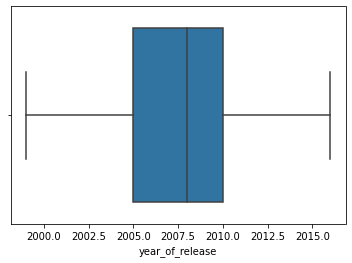

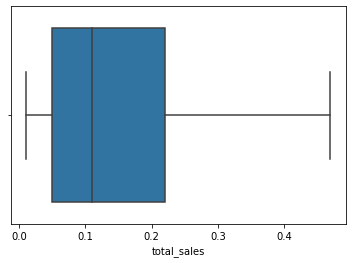

In [14]:
#Before changing user_score data type we will check if there is a string value that caused this situation:
df['user_score'].unique()
#we see that there is a value 'tbd' we'll want to check how many times it is repeated in the data and
#if it is related to some other column, such as the year of release:
sns.boxplot(data= df[df['user_score']== 'tbd'], x='year_of_release', showfliers=False)
plt.show()
sns.boxplot(data= df[df['user_score']== 'tbd'], x='total_sales', showfliers=False)
plt.show()

We see that there are 'tbd' values almost every year, meaning that it is not happening because of the year a game released.
Another option is the hypothesis whether if there not a lot of sales of the game, meaning that few players use the game,
thus, fewer players rank the game and there are not enough users to provide a user_score for the game. Regarding this option, we see that the total sales of the games are pretty low, but we can't be sure for 100% percent is it the cause.

Since user score 'tbd' is found 2,424 times but it seems that it is not related to a specific other charactaristic, we will replace the value with a numeric identifieble value so we could change the data type but also follow these rows and not analyze them.

In [15]:
df.loc[df['user_score']=='tbd' ,'user_score']=-1

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', -1, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [17]:
df["user_score"] = pd.to_numeric(df["user_score"])

In [18]:
round(len(df[df['user_score'].isna()])/df.shape[0], 2)

0.4

The missing values in user_score variable are 40% of the data and will be analyzed later so it is better to not change them artificially. 

In [19]:
#now, to ease the future analyses and comparisons between user and critic scores, we will multiply the user_score by 10
df['user_score']= df['user_score']*10
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [20]:
round(len(df[df['critic_score'].isna()])/df.shape[0], 2)

0.51

The missing values in critic_score variable are 51% of the data and will be analyzed later so it is better to not change them artificially. 

In [21]:
#Focusing on 'rating' variable
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [22]:
#first we will change 'K-A' values to 'E' because they mean the same thing:
df.loc[df['rating']=='K-A' ,'rating']='E'

In [23]:
#to fill the missing values in rating we will use the most common value of each game name:
df['rating'] = df.groupby(['name'])['rating'].transform(lambda grp: grp.fillna(grp.mode().max()))
#checking if there are still missing values:
df['rating'].isna().value_counts()

rating
False    10386
True      6327
Name: count, dtype: int64

We still have 6,327 rows with missing rating values but we don't have a good estimator to fill the values with, other than game's name. We will fill the missing values with 'no rating' value

In [24]:
df['rating'].fillna('no rating', inplace=True)
#checking if there are still missing values:
df['rating'].isna().value_counts()

rating
False    16713
Name: count, dtype: int64

In [25]:
df['rating'].unique()

array(['E', 'no rating', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [26]:
#checking for duplicated rows:
df.duplicated().value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


Our data have now 16,713 rows, missing values of name and genre were filtered out, missing values of critic' and user' score rating and year_of_release were filled with the most appropriate values or were left as missing values. All the variables have the right data type and there are no duplicates.

In [27]:
# Reviewer's code

df[df[['name', 'platform', 'year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,55.0,E,2.56
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,41.0,E10+,1.17
4127,Sonic the Hedgehog,PS3,2006.0,Platform,0.00,0.48,0.00,0.00,43.0,41.0,E10+,0.48
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,55.0,E,0.01


## Analyze the data

In [28]:
count_year = df.pivot_table(values='name', index= 'year_of_release', aggfunc='count').rename(columns={'name':'count'})
count_year

,count
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


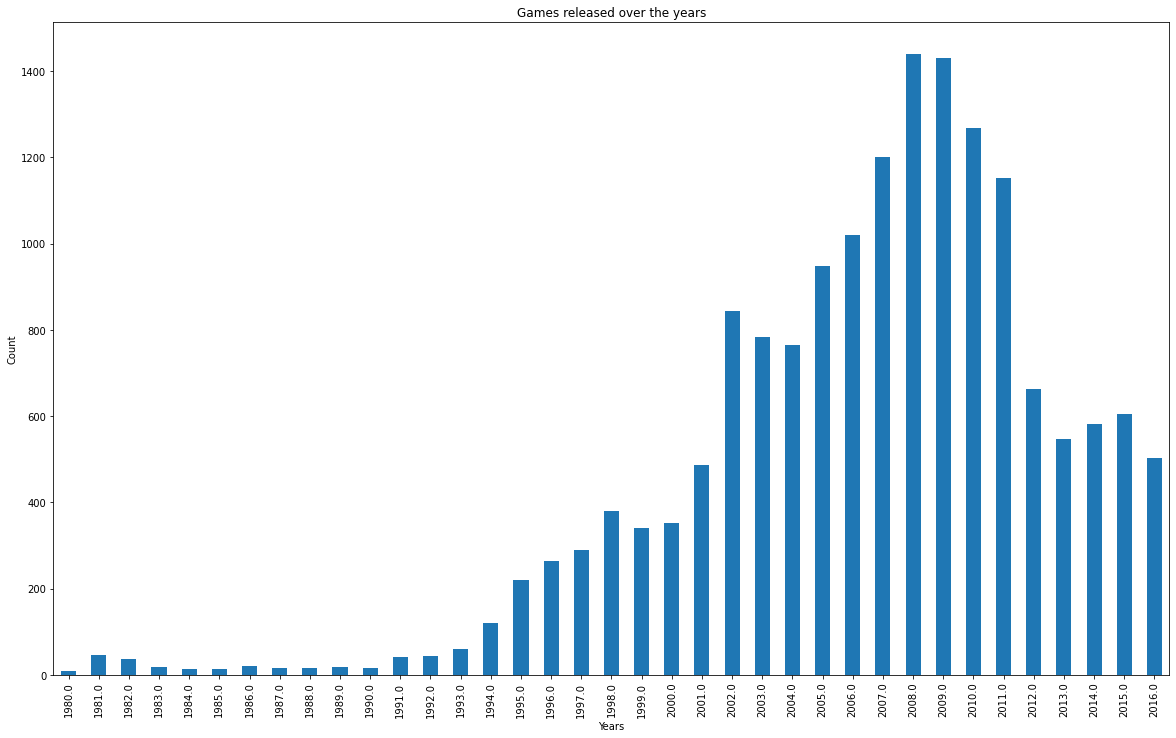

In [29]:
# Checking how many games were released in each year:
count_year.plot(kind='bar', figsize=(20,12),legend=False)
plt.title('Games released over the years')
plt.ylabel('Count')
plt.xlabel('Years')
plt.show()


We see that the number of game releasing every year grows gradually. Only from 1993 there are more than 50 games released every year, which allows us to analyze only 1993 and later. We will ommit the data before 1993:

In [30]:
ommited_df= df[df['year_of_release']>1992.0].reset_index(drop=True)
ommited_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16262 entries, 0 to 16261
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16262 non-null  object 
 1   platform         16262 non-null  object 
 2   year_of_release  16262 non-null  float64
 3   genre            16262 non-null  object 
 4   na_sales         16262 non-null  float64
 5   eu_sales         16262 non-null  float64
 6   jp_sales         16262 non-null  float64
 7   other_sales      16262 non-null  float64
 8   critic_score     8072 non-null   float64
 9   user_score       9931 non-null   float64
 10  rating           16262 non-null  object 
 11  total_sales      16262 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


In [ ]:
ommited_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
2,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
3,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38
4,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,85.0,E,29.80


In [ ]:
# Checking total sales in each platform:
platforms = ommited_df.groupby(['platform'])['total_sales'].agg('sum').sort_values().reset_index()
platforms


In [ ]:
fig=plt.figure(figsize=(20,5))
sns.barplot(x="platform", y='total_sales', data=platforms)
plt.title('Total sales per platform')
plt.ylabel('Sales in millions')
plt.xlabel('Platforms')
plt.show()


PS2, X360, PS3 and Wii are the platforms with the biggest amount of sales with more than 900 milion dollars. we'll check now how their sales looked over the years:

In [ ]:
# Reviewer's code

list(platforms.sort_values(by='total_sales')['platform'].tail(4))

In [ ]:
# Reviewer's code

l = list(platforms.sort_values(by='total_sales')['platform'].tail(4))

(ommited_df.query('platform in @l').groupby(['platform', 'year_of_release'])['total_sales'].agg('sum')
 .sort_values().reset_index().rename(columns={'total_sales':'total sales', 'year_of_release': 'year of release'})
)

In [ ]:
#creating a list of the 4 biggest platforms:
l = list(platforms.sort_values(by='total_sales')['platform'].tail(4))
#building a data frame for the four biggest plaforms:
sale_platforms = ommited_df.query('platform in @l').groupby(['platform', 'year_of_release'])['total_sales'].agg('sum').sort_values().reset_index().rename(columns={'total_sales':'total sales', 'year_of_release': 'year of release'})
#sale_platforms


In [ ]:
fig=plt.figure(figsize=(20,10))

sns.barplot(data=sale_platforms, x="year of release",y='total sales', hue="platform")
plt.title('Sales over the years per platform')
plt.ylabel('Sales in millions')
plt.xlabel('Years')
plt.show()


Focusing on the four platforms with biggest overall sales we can see that they are considerably new, only PS2 was launched in 2000 and the others, 5-6 years later. All the platforms show a bell curve, with a peak in sales (2002-2004 for PS2, 2009 for Wii, 2010 for X360 and 2011 for PS3) that is followed by a clear decline in sales. There is a clear pattern of purchase behavior of the users - every platform is launched, it takes for most of the cases a few years to reach a peak in sales and then it becomes less innovative and cool and displaced by a newer, more advanced platform and less users buy the platform until it is coming off the shelves. Based on these platforms the life span of platforms is 10-11 years, and it takes 3-5 years to get to the top and 4-5 years to fade.
Also we can see that when less platforms are sold in the same time, the sales are higher. 

To understand more clearly what is the life span of platforms we'll focus on plaforms that were popular on the past. We will pick platforms that are not the four mentioned above, bot their total sales over the years are above the median.

In [ ]:
median =platforms['total_sales'].median()
median

In [ ]:
#creating a list of the platforms that have above the median total sales but are not the 4 highest:
other_platforms = platforms.query('total_sales > @median & platform not in @l')['platform'].tolist()
#other_platforms
#creating a new df with data on sales for the chosen platforms
sale_other_platforms = ommited_df.query('platform in @other_platforms').groupby(['platform', 'year_of_release'])['total_sales'].agg('sum').sort_values().reset_index()
#sale_other_platforms

In [ ]:
#creating a list of the platforms that have sales in 2016 to ommit these platforms from the analysis
dead_plat_list = sale_other_platforms.query('year_of_release == 2016.0')['platform'].tolist()
#dead_plat_list
#creating a filtered df with data on the chosen platforms
sale_dead_platforms = sale_other_platforms.query('platform not in @dead_plat_list').sort_values(by=['year_of_release']).reset_index(drop=True)
sale_dead_platforms

In [ ]:
print(f" The average life span of a platform for popular platforms is:  {round(sale_dead_platforms.groupby('platform')['platform'].value_counts().mean(),2)} years.")


In [ ]:
#we want to check how the life span of all the platforms look like, to understand the data better:
plat_life_span=ommited_df.groupby(['platform', 'year_of_release'])['total_sales'].agg('sum').sort_values().reset_index()
plat_life_span.groupby('platform')['platform'].value_counts().describe()

In [ ]:
fig=plt.figure(figsize=(20,10))

sns.barplot(data=sale_other_platforms, x="year_of_release",y='total_sales')
plt.title('Sales over the years per platform - other successful platforms')
plt.ylabel('Sales in millions')
plt.xlabel('Years')
plt.show()


The average life span of popular platforms from the past is 9 years while the average across all the platforms is 7 years. We take into acount that this mean value includes considerably new platforms that released in the last years so they have low values, and also outliers that have extreme values. We are interested in most recent data which will give us the best estimation to users' preferences, we can see from the bar plot that from 2010 users' behavior is changing in it is resulted by the sales numbers. Half of average popular platform lifetime is 5 years, so further calculations we will only use data from 2012.0 and further.

In [ ]:
ommited_df2=ommited_df[ommited_df['year_of_release']>2011.0].reset_index(drop=True)
#ommited_df2.info()

In [ ]:
sales_all_plat= ommited_df2.pivot_table(values= 'total_sales', columns='platform', index='year_of_release', aggfunc='sum' )
sales_all_plat

We can see in the table above, that even though we analyze data from only the past 5 years, there are still platforms that do not have data from the past years, probably because they already were taken off the shelves. Thus, DS platform won't take into account in the next steps but PSP will because we only don't have the data for the past year, and we know that it still did not end so there is a chance that it still sold. 

In [ ]:
#filtering the irrelevant columns
sales_filt_plat = sales_all_plat.drop(['DS'], axis = 1).plot(figsize=(14,7), style='o-',title="Sales over the years per platform", xlabel='Year', ylabel='Sales in millions')
sales_filt_plat
plt.show()

From the graph and the table above we can see that most of the platforms have a some decline in sales on the 2013-2016 years, for some of them it is a steap continuos decline(X360, PS3,Wii) and for some it is more moderate(PSP,PSV,WiiU, PC, 3DS).
Despite the seen pattern of shrinking, we point out PS4 and XOne platforms as potentially profitable since both of them were released 4 years ago and comparing to the average duration they are still 'young' and their sales on the last year stand out compared to ther platforms. Adittionaly to them, we want to investigate 3DS platform which shows a moderate decline in sales but still is more profitable than the rest of the platforms in 2015-2016 years. Now we will focus on these 3 potential platforms and compare them to the results from the bigger df.

In [ ]:
#filtering the data with chosen platforms
games_filt_plat = ommited_df2.query('platform =="PS4" | platform == "XOne" | platform == "3DS"').reset_index(drop=True)
#games_filt_plat
#creating df of games in each platform and total sales
games = games_filt_plat.groupby(['name', 'platform'])['total_sales'].agg('sum').sort_values().reset_index()
#games

In [ ]:
platform_total_sales = games.pivot_table(values='total_sales', index='platform',  aggfunc= ['mean', 'median', 'var','std', 'min', 'max'] )
platform_total_sales.columns = platform_total_sales.columns.droplevel(1)
platform_total_sales

In [ ]:
fig=plt.figure(figsize=(20,5))
sns.boxplot(data=games, x="platform", y="total_sales", showfliers=False)
plt.show()

We see that PS4 has the highest average value of sales per game, but XOne has the highest median value and its variance is much smaller. The sales in each platform do not distributed normally and are skewed to the right, meaning that there are very high values in some games that affect the average revenue value per game.

In [ ]:
#creating df of sales per games across all platforms
games_all_plat = ommited_df2.groupby(['name', 'platform'])['total_sales'].agg('sum').sort_values().reset_index()
#games_all_plat
fig=plt.figure(figsize=(20,5))
sns.boxplot(data=games_all_plat, x="platform", y="total_sales", showfliers=False)
plt.show()

In [ ]:
all_platform_total_sales = games_all_plat.pivot_table(values='total_sales', index='platform',  aggfunc= ['mean', 'median', 'var','std', 'min', 'max'] )
all_platform_total_sales.columns = all_platform_total_sales.columns.droplevel(1)
all_platform_total_sales

Looking on all the platforms,we can see that the average game sales is pretty different between platforms, meaning that the platform has some effect on the game sales. The sales in each platform do not distributed normally and are skewed to the right, meaning that there are very high values in some games that affect the average revenue value per game in the platform.

To understand the possible effect of user and professional reviews on the sales, we will focus on PS4 platform which has the highest average sales per game and shows the highest sales in total in 2016.

In [ ]:
ps4_reviews = ommited_df2.loc[(ommited_df2['platform']== "PS4") & (ommited_df2['critic_score'].notnull()) & (ommited_df2['user_score'].notnull()), ['critic_score', 'user_score', 'total_sales'] ].reset_index(drop=True)
#ps4_reviews

In [ ]:
fig=plt.figure(figsize=(14,7))
sns.scatterplot(data=ps4_reviews, x='user_score', y="total_sales")
plt.title('Sales by user scores in PS4')
plt.ylabel('Sales in millions')
plt.xlabel('User scores')
plt.show()

In [ ]:
fig=plt.figure(figsize=(14,7))
sns.scatterplot(data=ps4_reviews, x='critic_score', y="total_sales")
plt.title('Sales by critic scores in PS4')
plt.ylabel('Sales in millions')
plt.xlabel('Critic scores')
plt.show()

In [ ]:
ps4_reviews.corr()

Based on the scatterplots and the correlation matrix we can say that user reviews have small negative correlation  of -0.01 with sales, meaning that the user scores do not affect (almost) at all the sales of games in the platform. In contrast, there is a small positive corrleation of 0.41 between the professional reviews and the sales, meaning that an increase in one point in critic's review will lead to an increase of 0.41 units of sales. Next we will compare the results to those calculated on two chosen platforms - we chose XOne and PS3 instead of XOne and 3DS, because a check on the amount of the specific games in 3DS platform showed too small data to analyze and PS3 was popular in the past so it is a good replacement.

In [ ]:
#creating a list of the games in the platform to compare them:
games_list = ommited_df2.query('platform== "PS4"')['name'].unique().tolist()
#games_list

In [ ]:
fig=plt.figure(figsize=(14,7))
sns.scatterplot(data=ommited_df2.query('(platform =="XOne"| platform=="PS3") & name in @games_list'), x='critic_score', y="total_sales", hue='platform')
plt.title('Sales by critic scores in XOne and PS3 platforms')
plt.ylabel('Sales in millions')
plt.xlabel('Critic scores')
plt.show()

In [ ]:
fig=plt.figure(figsize=(14,7))
sns.scatterplot(data=ommited_df2.query('(platform =="XOne"| platform=="PS3") & name in @games_list'), x='user_score', y="total_sales", hue='platform')
plt.title('Sales by user scores in XOne and PS3 platforms')
plt.ylabel('Sales in millions')
plt.xlabel('User scores')
plt.show()

In [ ]:
ommited_df2.query('platform =="XOne" & name in @games_list')[['user_score', 'critic_score', 'total_sales']].corr()

In [ ]:
ommited_df2.query('platform=="PS3" & name in @games_list')[['user_score', 'critic_score', 'total_sales']].corr()

Analyzing the data on the same games in the other two platforms who are profitable too, shows a bit different picture. In case of XOne platform, user reviews have small positive correlation  of 0.05 with sales, meaning that the user scores affect very little, but positively, on the sales of games in this platform; and in the case of PS3 we see a small positive correlation of 0.15 between user's score and sales, it is much stronger correlation than in XOne or PS4 but overall still considered as weak relationship between the variables.
In XOne there is a moderate positive corrleation of 0.4 between the professional reviews and the sales, meaning that an increase in one point in critic's review will lead to an increase of 0.4 units of sales, a bit smaller result of 0.37 represented in PS3 platform.These correlations are similar to the correlation in PS4 platform. Although there are differences, it can be said that the conclusions are alike - user reviews almost do not affect the sales while critic' reviews do.

In [ ]:
game_by_genre = ommited_df2.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'mean'])
game_by_genre.columns = game_by_genre.columns.droplevel(1)
#game_by_genre

In [ ]:
game_by_genre.sort_values(by=['count']).plot(kind='bar', y='count', ylabel='Count of games', xlabel='Genre', title='Number of games per genre', legend=False)
plt.show()

We see that most of the games released are related to 'action' genre which has significantly bigger amount compared to other categories. After action, the next genres with high numbers of games released are 'role-playing' and 'adventure' genres.

In [ ]:
game_by_genre.sort_values(by=['sum']).plot(kind='bar', y='sum', ylabel='Sales in millions', xlabel='Genre', title='Sales per genre', legend=False)
plt.show()

We see that 'Action' genre not only has the highest amount of games but also is the most profitable.'Shooter'genre also has great revenue and is the second highest, followed by 'role-playing'. 

In [ ]:
game_by_genre.sort_values(by=['mean']).plot(kind='bar', y='mean', ylabel='Sales in millions', xlabel='Genre', title='Average game sales per genre', legend=False)
plt.show()

'Shooter', 'platform' and 'sports' genres have high revenue but the number of games released under the genres is not so high, meaning that even though the amount of games released is not very high - these games are very profitable and popular; in contrast to 'action' genre or 'role-playing' that their sales are not so big compared to the amount of games released.  

### Creating regional user profile 

In [ ]:
sales_eu_plat=ommited_df2.pivot_table(values= 'eu_sales', columns='platform', aggfunc='sum' ).T.sort_values(by=['eu_sales'], ascending=False).head(5)
#sales_eu_plat

In [ ]:
sales_jp_plat_y= ommited_df2.pivot_table(values= 'jp_sales', columns='platform', aggfunc='sum' ).T.sort_values(by=['jp_sales'], ascending=False).head(5)
#sales_jp_plat_y

In [ ]:
sales_na_plat_y= ommited_df2.pivot_table(values= 'na_sales', columns='platform', aggfunc='sum' ).T.sort_values(by=['na_sales'], ascending=False).head(5)
#sales_na_plat_y

In [ ]:
from functools import reduce
data_frames = [sales_na_plat_y,  sales_jp_plat_y,sales_eu_plat] 
platforms_merged = reduce(lambda  left,right: pd.merge(left,right,on=['platform'], how='outer'), data_frames)
platforms_merged

We can see that PS4, 3DS, PS3 are in the top 5 platforms in all the regions, but other platforms such as WiiU, XOne, X360, PSV are popular in one or two regions but not in all of them. Additionally, we can see that there are very big differences in sales between the first and the fifth best platforms in each region. Most of these platforms were highlighted earlier as potentially profitable platforms or 'young' platforms with under the average duration. Next we'll look how their sales varies between regions.

In [ ]:
platforms_merged.plot(figsize=(14,7),kind='bar', ylabel='Sales in millions', xlabel='Platform', title='Sales of top platforms by region')
plt.show()

In [ ]:

platforms_merged.plot(figsize=(14,7),kind='pie',subplots=True, title='Top platforms market share by region',layout=(1, 3), legend=False, autopct='%1.0f%%')
plt.show()


We see that the sales of every platforms are different between regions - other than PS3 which has similar market share in all the regions (20-26%), PS4 succeed in EU and NA regions (22-34%) but not so much in JP (9%) and on the opposite - 3DS has more than half of the market share in JP but only 10% in EU and NA regions. XOne and X360 that succeed the most in NA and then in EU, are not in the top 5 in JP; and WiiU and PSV which have 20% of the market in JP are not in the top 5 of EU region nor NA region.
Overall we see that EU region and NA are more similar in user's buying behavior and buy all kinds of platforms while JP users show different behavior  - they and are more specific in their preferences and buy mainly the 3DS platform. Next we'll try to understand if there are differences in genre preferences between regions:

Assuming that top five genres are the genres that the ratio between their amount and revenue are the highest, we'll take the genres with the highest average values in each region.

In [ ]:
#creating table of sales and avg sales by genre in eu region:
sales_eu_genre=ommited_df2.pivot_table(values= 'eu_sales', index='genre', aggfunc=['mean', 'sum'] )
sales_eu_genre.columns =sales_eu_genre.columns.droplevel(1)
#sorting by mean to find top 5
sales_eu_genre = sales_eu_genre.sort_values(by=['mean'], ascending=False).head(5)
sales_eu_genre=sales_eu_genre[['sum']].rename(columns={'sum':'eu_sales'})
sales_eu_genre

In [ ]:
#creating table of sales and avg sales by genre in na region:
sales_na_genre=ommited_df2.pivot_table(values= 'na_sales', index='genre', aggfunc=['mean', 'sum'] )
sales_na_genre.columns =sales_na_genre.columns.droplevel(1)
#sorting by mean to find top 5
sales_na_genre = sales_na_genre.sort_values(by=['mean'], ascending=False).head(5)
sales_na_genre=sales_na_genre[['sum']].rename(columns={'sum':'na_sales'})
#sales_na_genre

In [ ]:
#creating table of sales and avg sales by genre in jp region:
sales_jp_genre=ommited_df2.pivot_table(values= 'jp_sales', index='genre', aggfunc=['mean', 'sum'] )
sales_jp_genre.columns =sales_jp_genre.columns.droplevel(1)
#sorting by mean to find top 5
sales_jp_genre = sales_jp_genre.sort_values(by=['mean'], ascending=False).head(5)
sales_jp_genre=sales_jp_genre[['sum']].rename(columns={'sum':'jp_sales'})
#sales_jp_genre

In [ ]:
data_frames2 = [sales_na_genre, sales_jp_genre,sales_eu_genre] 
genres_merged = reduce(lambda  left,right: pd.merge(left,right,on=['genre'], how='outer'), data_frames2)
genres_merged

We can see that platform genre is the only one who is in the top 5 genres in all the regions. The genres 'shooter', 'sports', 'fighting' and 'simulation' are in the top 5 in 2 regions and 'misc', 'role-playing', 'puzzle' and 'racing' are in the top in only one of the regions. 
Unlike the platforms earlier, we see more variety in prefered genres between regions. 

In [ ]:
genres_merged.plot(figsize=(14,7),kind='bar', ylabel='Sales in millions', xlabel='Genre', title='Sales of top genres by region')
plt.show()

In [ ]:
genres_merged.plot(subplots=True,figsize=(20,7),kind='pie', title='Top genres market share by region', legend=False, autopct='%1.0f%%')
plt.show()

We see that the sales of every genre are different between regions - other than Platform which has similar market share in all the regions (8-9%), Shooter and Sports succeed in EU and NA regions (46-47% and 26-28% respectively) but not in JP and on the opposite - Role-playing has almost 70% the market share in JP but is not in the top 5 in EU and NA regions. Simulation genre has 6-11% of the market in JP and EU and Fighting has 6-10% in JP and NA. Puzzle genre is popular only in JP, Racing only in EU and Misc only in NA. 
Overall we see that EU region and NA are a bit more similar in user's buying behavior compared to JP users who are more specific in their preferences and buy mainly the Role-playing genre games. But here we see that there differences in preferences between all the regions. Next we'll try to look how ESRB ratings affect the sales in every region:

In [ ]:
ersb_regions = ommited_df2.pivot_table(columns='rating', values=['na_sales', 'jp_sales', 'eu_sales'], aggfunc=['sum'])
ersb_regions.columns = ersb_regions.columns.droplevel(0)
ersb_regions= ersb_regions.T
ersb_regions

In [ ]:
ersb_regions.plot(figsize=(14,7),kind='bar', ylabel='Sales in millions', xlabel='ESRB Rating', title='Sales by ESRB ratings in regions')
plt.show()

We see that all regions buy games rated by all the labels. 
Here we see the same pattern seen above - NA users spend more than other users in total, and EU spend less than them but show similar pattern of behavior; meaning that the ranking maybe affects the sales overall, but this effect is the same for both regions. Intrestingly, EU and NA highest sales are in 'mature' rated games compared to all other ratings. In contrast, JP users buy mostly games that are not rated and after that games for teens ('T') or for everyone ('E'). 

### Testing hypotheses:
1. Xbox One user ratings Vs. PC  user ratings:

H0- the avarage ratings of users of Xbox One and PC are equal.
H1- the average ratings of usersof Xbox One and PC are not equal.
alpha will set as 5%
We will check the hypothesis in a two-tailed t-test, we will check the assumption regarding group's variances because we cannot be sure that these are the same users and maybe their ratings do not have the same variance.

In [ ]:
alpha=0.05
user_xbox = ommited_df2.query('platform== "XOne" & user_score<=100.0 &user_score>=0.0')['user_score'].reset_index(drop=True)
user_pc = ommited_df2.query('platform== "PC" & user_score<=100.0 &user_score>=0.0')['user_score'].reset_index(drop=True)

In [ ]:
user_xbox.describe()

In [ ]:
user_pc.describe()

In [ ]:
# Test the hypothesis
if np.var(user_xbox, ddof=1)== np.var(user_pc, ddof=1):
    results = st.ttest_ind(user_xbox, user_pc, equal_var=True)
else: 
    results = st.ttest_ind(user_xbox, user_pc, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis, meaning that the average users' scores of Xbox One and PC platforms are significantly differnt in 95%.")
else:
    print("We can't reject the null hypothesis, meaning that the average users' scores of Xbox One and PC platforms are equal in 95%.")


2. Action genre' user ratings Vs. sports genre' user ratings:
*Altough the hypothesis is written as a check of difference, the statistical test assumes as a null hypothesis an equal means.*
H0- the avarage ratings of users of Action genre and Sports genre are equal.
H1- the average ratings of users of Action genre and Sports genre are not equal.
alpha will set as 5%
We will check the hypothesis in a two-tailed t-test, we will check the assumption regarding group's variances because we cannot be sure that these are the same users and maybe their ratings do not have the same variance.

In [ ]:
user_action = ommited_df2.query('genre== "Action" & user_score<=100.0 &user_score>=0.0')['user_score'].reset_index(drop=True)
user_sports = ommited_df2.query('genre== "Sports" & user_score<=100.0 &user_score>=0.0')['user_score'].reset_index(drop=True)

In [ ]:
user_action.describe()

In [ ]:
user_sports.describe()

In [ ]:
# Test the hypotheses
if np.var(user_action, ddof=1)== np.var(user_sports, ddof=1):
    results = st.ttest_ind(user_action, user_sports, equal_var=True)
else: 
    results = st.ttest_ind(user_action, user_sports, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis, meaning that the average users' scores of sports and action genres are not significantly equal in 95%.")
else:
    print("We can't reject the null hypothesis, meaning that the average users' scores of sports and action genres are equal in 95%.")


### Final conclusions:

After fixing wrong data types and fill missing values, we have found that before 1993 there were not many games released every year, so we filtered the data. We have learned that in general the average life span of games is 7 years and 9 in case of popular games, for that reason we analyzed only data from 2012, which is half of average life time in order to make clearer prediction for 2017 year.

1. Analyzing the platforms led to a finding of the most profitable platforms for 2016 - PS4 and XOne which are only 4 years old, meaning that theoretically their peak has not come yet; and 3DS which is in a moderate decline in sales but still has more revenue compared to the rest.
2. A small positive correlation was found between critic's score and game's sales, but not between user's score and sales. 
3. The most profitable genres in average are 'Shooter', 'platform' and 'sports' , the most profitable genres are action, shooter and role-playing.
4. Users in Japan present different preferences compared to users in North America or Europe, their highest selling platform is 3DS which has the biggest market share without any competition, in contrast to NA and EU that prefer the PS4, PS3 or X360 after that.
5. This difference is presented in genre preferences too - JP region prefers heavily 'Role-Playing' genre games, compared to EU and NA which buy mostly 'Shooter' and 'Sports' games. 
6. JP users buy mainly  games that have no ESRB rating while EU and NA buy more mature or eveyone rated games. 
7. The average user score of Xbox One is not significantly different compared to scores given to PC platform. In contrast, the  average scores of action genre and sports genre are significantly different in alpha=5%.
#### Planning the next year campaigns should take into account the differences between regions and to advertise and promote 3DS platform, not labeled and mainly role-playing games for JP users, in contrast to EU and NA users that should see more promotions on PS4 or XOne platforms, 'everyone' or 'mature' labeled, and mainly shooter and sport games. Additionally, it will be wise to promote to all the regions 'Platform' genre game which have high rate of sales-amount, and is in the top 5 of all the regions;  and to promote other games that achieve high critic's rates due to the positive correlation that was found. 